# 2. Pandas 주요 데이터 타입
## 2.2 DataFrame (데이터프레임)
<img src="img/2강/dataframe구조NEW.jpg" alt="datetime" style="width: 1200px;"/>

### 2.2.1 데이터프레임 생성
### 생성자 인자
#### 1) data : dataFrame에 저장할 데이터 (numpy ndarray, dict, DataFrame 등 여러 형태 가능)
#### 2) index : 행(row) 이름, 기본값 = 0부터 1씩 증가하는 정수
#### 3) columns : 열(column) 이름, 기본값 = 0부터 1씩 증가하는 정수
#### 4) dtype : 데이터 형태(type), 만약 지정하지 않으면 파이썬이 자동으로 값의 형태를 보고 결정
#### 5) copy : 입력 데이터를 복사할지 지정. 디폴트는 False 임. (복사할 거 아니면 메모리 관리 차원에서 디폴트인 False 설정 사용하면 됨)

In [1]:
# Pandas 라이브러리 임포트
import pandas as pd 
from pandas import Series, DataFrame

In [2]:
# 1. 빈 데이터프레임 생성
DataFrame()

""


In [3]:
# 2차원 데이터 생성하기
# 처음에는 index, columns 없이 했다가 
# 두번째에는 인자 추가해서 실습
df2 = DataFrame(data = [
                [1,2,3],
                ['kim','park','lee'],
                [1.5, 3.2, 9.1]
                ],
            index =  ['A','B','C'],
            columns = ['X','Y','Z'])
df2
## 로우 인덱스와 컬럼 인덱스와 데이터의 크기가 맞지 않는 경우

,X,Y,Z
A,1,2,3
B,kim,park,lee
C,1.5,3.2,9.1


In [4]:
# 인덱스 변경
df2.index = ['AA','BB','CC']
df2
df2.columns = ['XX','YY','ZZ']
df2

,XX,YY,ZZ
AA,1,2,3
BB,kim,park,lee
CC,1.5,3.2,9.1


In [5]:
# 3. 사전 타입 데이터를 이용하여 데이터 프레임 생성하기
인구통계 = {'서울': [950, 945, 938.5],
        '대전':[50, 151, 145],
        '대구':[85, 88, 92],
        '부산':[180, 187, 192],
        '광주':[74, 80, 80]
      }
df3 = DataFrame(인구통계, index = [2018, 2019, 2020])
df3

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80
2020,938.5,145,92,192,80


In [6]:
# 데이터프레임 구조 정리 (ppt)

In [7]:
type(df3.index)

pandas.core.indexes.numeric.Int64Index

In [8]:
type(df3.columns)

pandas.core.indexes.base.Index

In [9]:
type(df3.values)

numpy.ndarray

### 2.2.2. DataFrame 속성 조회하기 (속성을 조회할 때에는 ()를 사용하지 않으니 유의)

In [10]:
#1. index : 데이터프레임의 인덱스를 리스트로 반환
df3.index



Int64Index([2018, 2019, 2020], dtype='int64')

In [11]:
# df3에 로우 인덱스를 2018, 2019, 2020로 만들기
df3.index = [2018, 2019, 2020]
df3

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80
2020,938.5,145,92,192,80


In [12]:
#2. columns : 데이터프레임의 컬럼을 리스트로 반환
df3.columns
df3

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80
2020,938.5,145,92,192,80


In [13]:
#3. values 
df3.values

array([[950. ,  50. ,  85. , 180. ,  74. ],
       [945. , 151. ,  88. , 187. ,  80. ],
       [938.5, 145. ,  92. , 192. ,  80. ]])

In [14]:
#4. shape : 행(row)과 열(column)의 개수(차원)을 튜플로 반환
df3.shape

(3, 5)

In [15]:
#5. T (Transpose) : 행과 열을 바꾸기.
df3.T

,2018,2019,2020
서울,950.0,945.0,938.5
대전,50.0,151.0,145.0
대구,85.0,88.0,92.0
부산,180.0,187.0,192.0
광주,74.0,80.0,80.0


In [16]:
#6. axes : 행과 열 이름을 리스트로 반환
df3.axes

[Int64Index([2018, 2019, 2020], dtype='int64'),
 Index(['서울', '대전', '대구', '부산', '광주'], dtype='object')]

In [17]:
#7. dtypes : 데이터 형태 반환
df3.dtypes

서울    float64
대전      int64
대구      int64
부산      int64
광주      int64
dtype: object

In [18]:
#8. size : DataFrame의 원소의 개수를 반환
df3.size

15

### 2.2.3. 데이터프레임 기본 함수

In [19]:
#1. info() - 기본 정보 출력
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2018 to 2020
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서울      3 non-null      float64
 1   대전      3 non-null      int64  
 2   대구      3 non-null      int64  
 3   부산      3 non-null      int64  
 4   광주      3 non-null      int64  
dtypes: float64(1), int64(4)
memory usage: 224.0 bytes


In [20]:
#2. describe() - 기본 통계 정보 출력
df3.describe()
# 숫자형 컬럼들만 출력되며, 통계를 구할 수 없는 문자열 컬럼들은 출력되지 않습니다 .

,서울,대전,대구,부산,광주
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,944.500000,115.333333,88.333333,186.333333,78.000000
std,5.766281,56.659804,3.511885,6.027714,3.464102
min,938.500000,50.000000,85.000000,180.000000,74.000000
25%,941.750000,97.500000,86.500000,183.500000,77.000000
50%,945.000000,145.000000,88.000000,187.000000,80.000000
75%,947.500000,148.000000,90.000000,189.500000,80.000000
max,950.000000,151.000000,92.000000,192.000000,80.000000


In [21]:
# 통계 함수 (mean, sum, max, min, ...)
#df3.mean()
#df3.median()
df3.quantile(0.25)  #: 25%, 75%, ..

서울    941.75
대전     97.50
대구     86.50
부산    183.50
광주     77.00
Name: 0.25, dtype: float64

In [22]:
# axis 인자 활용
#df3.mean(axis = 1)
# 인구수 평균 --> mean()
#df3.mean()
df3.mean(axis = 1)

2018    267.8
2019    290.2
2020    289.5
dtype: float64

In [23]:
# 일부 데이터만 랜덤으로 선택
#df3.sample(2)
df3.sample(2, axis = 1)

,서울,부산
2018,950.0,180
2019,945.0,187
2020,938.5,192


In [24]:
# 3. head, tail(x) - 맨 앞 혹은 맨 뒤의 x개의 데이터만 출력
#df3.head(2)
df3.tail(2)
#df3.tail(2, axis = 1)

,서울,대전,대구,부산,광주
2019,945.0,151,88,187,80
2020,938.5,145,92,192,80


In [25]:
# nunique() - unique한 값의 개수
df3.nunique()
#df3.nunique()

서울    3
대전    3
대구    3
부산    3
광주    2
dtype: int64

<AxesSubplot:>

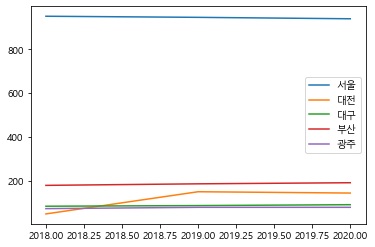

In [26]:
# 데이터 시각화 함수
%matplotlib inline
import matplotlib as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
df3.plot()

In [27]:
# filter() - 원하는 데이터만 선택 
#df3
#df3.filter(['서울'])
#df3.filter(['서울','부산'])
df3.filter([2018], axis = 0)
#-> TypeError: 'int' object is not iterable 발생. 
# iterable이란 1차원 데이터와 같이 여러 개의 값으로 이루어져 있다고 이해
#df3.filter(['서울', '대전'])
#df3.filter([2019], axis = 0)

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74


In [28]:
# 정규 표현식 ()

#df3.filter(regex = '^대') # '대'로 시작하는 컬럼만 선택
#df3.filter(regex = '^201', axis = 0) # '2010년대 행만 선택'
df3.filter(regex = '0$', axis = 0) # 10년 단위의 행만 선택 (2000, 2010, 2020, 2030, ...)

,서울,대전,대구,부산,광주
2020,938.5,145,92,192,80


In [29]:
# df3[df3.columns[df3.columns.str.contains('^대')]]

# 3-3차시

### 2.2.3. 데이터프레임 조회하기

In [30]:
# 테스트 데이터프레임 생성
df4 = DataFrame({'Class': ['IoT','Network', 'Economy','Big Data', 'Cloud'],
                       'Year': [2018, 2017, 2018, 2018, 2019],
                       'Price': [100, 125, 132, 312, 250],
                       'Location': ['Korea','Korea', 'Korea', 'US','Korea']},
                      index=['C01','C02','C03', 'C04', 'C05'])
df4

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [31]:
## 컬럼 인덱스 우선
## 로우 인덱스와 컬럼 인덱스의 차이 - 순서 유무
## 

## **데이터프레임 조회 규칙 **
### 로우 인덱스는 숫자 슬라이싱이 되지만, 컬럼은 불가능하다. (컬럼은 순서 개념이 없음)
### 기본적으로 "컬럼"을 먼저 인덱싱한다. 
<img src="./img/2강/데이터프레임조회NEW.jpg" width="900">

In [32]:
# 1) Class만 조회하기
df4['Class']
#df4.Class # <-- . 뒤에 컬럼명을 명시해도 된다.

C01         IoT
C02     Network
C03     Economy
C04    Big Data
C05       Cloud
Name: Class, dtype: object

In [33]:
# 2) Class와 Price만 조회하기
# 여러 개의 컬럼들을 조회하기 위해서는 컬럼명들을 리스트로 선언해야 함.
df4[['Class','Price']]
#df4[['Class','Price']]

,Class,Price
C01,IoT,100
C02,Network,125
C03,Economy,132
C04,Big Data,312
C05,Cloud,250


In [34]:
# 3) 로우를 로우 인덱스로 접근하여 조회하기 (loc)
# 로우 인덱스가 'C04'인 경우만 조회하기
#df4['C04'] #
#df4['C04', axis = 0] # 함수가 아니므로, 실행 X
df4.loc['C04']
#df4.loc['C04']

Class       Big Data
Year            2018
Price            312
Location          US
Name: C04, dtype: object

In [35]:
# 4) 로우를 숫자 인덱스로 접근하여 조회하기 (iloc)
# 3번째 로우(row) 조회하기
df4.iloc[2]

Class       Economy
Year           2018
Price           132
Location      Korea
Name: C03, dtype: object

In [36]:
#df4.loc[['C02', 'C04']]
df4.iloc[[1,3]]

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C04,Big Data,2018,312,US


In [37]:
# 5) 숫자 인덱스로 슬라이싱하기 (start index는 포함되지만, end index는 포함 안됨.)
# 숫자 인덱스가 1~3까지 데이터만 조회하기
#df4.iloc[1:4]
#df4.loc['C02':'C04']
# 6) 로우 인덱스로 슬라이싱하기 (start index와 end index 모두 포함)
# C02~C04까지 조회
df4['C02':'C04']

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US


In [38]:
# Class부터 Price까지의 컬럼을 선택
#df4[['Class','Year','Price']]
df4['Class':'Price']

,Class,Year,Price,Location


In [39]:
# 기본적으로 인덱싱을 하면, 컬럼을 기준으로 탐색을 하지만, 슬라이싱은 컬럼에 적용할 수 없기 때문에 로우에 적용된다. 
df4[1:5]

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [40]:
# 7. 특정 컬럼과 로우를 동시에 인덱싱하기
# C02, C03 강의의 Class와 Year만 조회
#df4['C01':'C02'][['Class','Year']]
#df4.loc[['C01','C02']][['Class', 'Year']]
#df4[['Class','Year']].loc[['C01','C02']]
df4[['Class','Year']]['C01':'C02']

,Class,Year
C01,IoT,2018
C02,Network,2017


In [41]:
# 8. 조건 인덱싱 
# Price가 200보다 큰 강의만 조회하기
# df4 > 200 데이터프레임에 바로 조건을 사용할 수는 없다. 
df4[df4.Price > 200]

,Class,Year,Price,Location
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [42]:
df4.Price > 200

C01    False
C02    False
C03    False
C04     True
C05     True
Name: Price, dtype: bool

In [43]:
# 아래 결과들이 출력되도록 코드를 완성하시오.
# 실습 1. 'Year' 컬럼만 출력
#df4.Year
#df4['Year']
df4.Year

C01    2018
C02    2017
C03    2018
C04    2018
C05    2019
Name: Year, dtype: int64

In [44]:
# 실습 2. 'Class'와 'Location' 컬럼만 조회
#df4[['Class','Location']]
df4[['Class','Location']]

,Class,Location
C01,IoT,Korea
C02,Network,Korea
C03,Economy,Korea
C04,Big Data,US
C05,Cloud,Korea


In [45]:
# 실습 3. C01과 C03 강의의 모든 컬럼 조회
#df4.loc[['C01','C03']]
# C01만 선택
#df4['C01']
df4.loc[['C01', 'C03']]
#df4.iloc[0]

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C03,Economy,2018,132,Korea


In [46]:
# C02 ~ C04 강의를 선택
#df4.loc['C02':'C04']
df4['C02':'C04']
#df4.iloc[1:4]

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US


In [47]:
#df4['C02':'C04']
#df4[['C02', 'C03','C04']]
df4

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [48]:
# 실습 4. C01~C03 강의의 Class와 Price만 조회
#df4[['Class','Price']][:3]
#df4[['Class', 'Price']].loc['C01':'C03']
#df4[['Class', 'Price']]['C01':'C03']
#df4.loc['C01':'C03'][['Class', 'Price']]

df4.loc['C01':'C03', ['Class','Price'] ]

,Class,Price
C01,IoT,100
C02,Network,125
C03,Economy,132


In [49]:
# 실습 4. 2019년도 강의 출력
#df4[[False, False, True, False, True]] # True은 row만 선택
#df4.Year== 2019
df4[df4.Year == 2019]

,Class,Year,Price,Location
C05,Cloud,2019,250,Korea


In [50]:
# 실습 5. 가장 가격이 비싼 강의 정보 조회
#df4[df4.Price == max(df4.Price)]
df4[df4.Price == df4.Price.max()]

,Class,Year,Price,Location
C04,Big Data,2018,312,US


In [52]:
# 실습 6. 2018, 2019년도에 개설된 강의 조회
#df4[df4.Year.isin([2018, 2019])]
df4[df4.Year.isin([2018, 2019])]

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [53]:
# 실습 7. 2018년도에 한국에서 개설된 강의 조회
#df4[(df4.Year == 2018) & (df4.Location == 'Korea')]
df4[(df4.Year == 2018) & (df4.Location == 'Korea')]

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C03,Economy,2018,132,Korea


In [56]:
# C02 번 클래스의 Class, Price만 선택
#df4.loc['C02', ['Class', 'Price'] ]
df4

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [59]:
# C02, C03 번 클래스의 Class~Price만 선택
df4.loc[['C02','C03'], 'Class':'Price']

,Class,Year,Price
C02,Network,2017,125
C03,Economy,2018,132


# 4-1차시

### 2.2.4. 데이터프레임에 새로운 컬럼 추가하기

In [64]:
df4

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [65]:
# 컬럼 추가하기 1.
# limitStudent 컬럼(정원)을 추가하고, 값을 모두 30으로 저장
df4['limitStudent'] = 30
df4

,Class,Year,Price,Location,limitStudent
C01,IoT,2018,100,Korea,30
C02,Network,2017,125,Korea,30
C03,Economy,2018,132,Korea,30
C04,Big Data,2018,312,US,30
C05,Cloud,2019,250,Korea,30


In [70]:
# 컬럼 추가하기 2.
# numStudent 컬럼(수강학생수)을 추가하고, 값을 25,30,10,23,17로 저장 
df4['numStudent'] = [25,30,10,23, 17]
df4

,Class,Year,Price,Location,limitStudent,numStudent
C01,IoT,2018,100,Korea,30,25
C02,Network,2017,125,Korea,30,30
C03,Economy,2018,132,Korea,30,10
C04,Big Data,2018,312,US,30,23
C05,Cloud,2019,250,Korea,30,17


In [71]:
# 컬럼 추가하기 3
# priceLevel 컬럼을 추가하고, 
# Price가 200과 같거나 크면, High, 200보다 작으면 Low

# 1) 함수 정의
def func1(X):
    if X >= 200:
        return 'High'
    else:
        return 'Low'

In [73]:
func1(170)

'Low'

In [106]:
df4.apply

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel
C01,IoT,2018,100,Korea,30,25,Low
C02,Network,2017,125,Korea,30,30,Low
C03,Economy,2018,132,Korea,30,10,Low
C04,Big Data,2018,312,US,30,23,High
C05,Cloud,2019,250,Korea,30,17,High


In [78]:
#df4.Price
#func1(df4.Price)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [111]:
df4.Price.apply(func1)
#df4.Price.apply(lambda X: func1(X))

C01     Low
C02     Low
C03     Low
C04    High
C05    High
Name: Price, dtype: object

In [115]:
df4.apply('sum', axis = 1)

C01    2173
C02    2202
C03    2190
C04    2383
C05    2316
dtype: int64

In [83]:
df4['PriceLevel'] = df4.Price.apply(lambda X: func1(X))

In [84]:
df4

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel
C01,IoT,2018,100,Korea,30,25,Low
C02,Network,2017,125,Korea,30,30,Low
C03,Economy,2018,132,Korea,30,10,Low
C04,Big Data,2018,312,US,30,23,High
C05,Cloud,2019,250,Korea,30,17,High


In [85]:
# 1) apply 함수 --> 함수를 적용(apply)하는 함수
#df4.sum()
df4.apply('sum') # = df4.sum()

Class           IoTNetworkEconomyBig DataCloud
Year                                     10090
Price                                      919
Location                KoreaKoreaKoreaUSKorea
limitStudent                               150
numStudent                                 105
PriceLevel                   LowLowLowHighHigh
dtype: object

In [89]:
#df4.apply('sum', axis = 1)
df4

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel
C01,IoT,2018,100,Korea,30,25,Low
C02,Network,2017,125,Korea,30,30,Low
C03,Economy,2018,132,Korea,30,10,Low
C04,Big Data,2018,312,US,30,23,High
C05,Cloud,2019,250,Korea,30,17,High


In [56]:
#df4.sum()
df4.apply(lambda X: X.sum())

Class           IoTNetworkEconomyBig DataCloud
Year                                     10090
Price                                      919
Location                KoreaKoreaKoreaUSKorea
limitStudent                               150
numStudent                                 105
dtype: object

In [57]:
df4.sum(axis = 1)
df4.apply('sum', axis = 1)
#df4
#df4.apply(lambda X: X.sum(), axis = 1) # 문자와 숫자 간의 sum() 연산이 수행 불가능

C01    2173
C02    2202
C03    2190
C04    2383
C05    2316
dtype: int64

In [58]:
df4['PriceLevel'] = df4.apply(lambda X: func1(X.Price), axis = 1)

In [59]:
df4

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel
C01,IoT,2018,100,Korea,30,25,Low
C02,Network,2017,125,Korea,30,30,Low
C03,Economy,2018,132,Korea,30,10,Low
C04,Big Data,2018,312,US,30,23,High
C05,Cloud,2019,250,Korea,30,17,High


In [60]:
# 컬럼 추가하기 4 - 기존 컬럼을 이용하여 새 컬럼 추가하기
df4['income'] = df4['Price'] * df4['numStudent']
df4

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel,income
C01,IoT,2018,100,Korea,30,25,Low,2500
C02,Network,2017,125,Korea,30,30,Low,3750
C03,Economy,2018,132,Korea,30,10,Low,1320
C04,Big Data,2018,312,US,30,23,High,7176
C05,Cloud,2019,250,Korea,30,17,High,4250


## ** 산술 연산 **

In [90]:
# 1) 두 값의 산술연산
5 + 10

15

In [93]:
# 2) 1차원 데이터와 하나의 값 간의 산술 연산 
sr = Series([1,3,5,7])
sr + 50

0    51
1    53
2    55
3    57
dtype: int64

In [94]:
# 3) 1차원 데이터 간의 산술 연산 (매출액이라고 가정)
sr2020 = Series([4500, 2800, 3000], index = ['삼성','롯데','LG'])
sr2020

삼성    4500
롯데    2800
LG    3000
dtype: int64

In [96]:
sr2021 = Series([4800, 3500, 2500], index = ['삼성','롯데','SK'])
sr2021

삼성    4800
롯데    3500
SK    2500
dtype: int64

In [99]:
#sr2020 + sr2021
#sr2020.add(sr2021)
sr2020.add(sr2021, fill_value = 0)

# + : add()
# - : sub()
# X : mul()
# / : div()

LG    3000.0
SK    2500.0
롯데    6300.0
삼성    9300.0
dtype: float64

In [66]:
df4.numStudent/df4.limitStudent*100

C01     83.333333
C02    100.000000
C03     33.333333
C04     76.666667
C05     56.666667
dtype: float64

In [67]:
# 실습 6. rate 컬럼을 추가하고, 충원율을 계산하여 할당. 
df4['rate'] = df4.numStudent/df4.limitStudent*100
df4

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel,income,rate
C01,IoT,2018,100,Korea,30,25,Low,2500,83.333333
C02,Network,2017,125,Korea,30,30,Low,3750,100.000000
C03,Economy,2018,132,Korea,30,10,Low,1320,33.333333
C04,Big Data,2018,312,US,30,23,High,7176,76.666667
C05,Cloud,2019,250,Korea,30,17,High,4250,56.666667


In [68]:
# 반올림하여 소수점 첫째짜리까지 출력
#df4.round({'rate':1})
df4.round(1)

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel,income,rate
C01,IoT,2018,100,Korea,30,25,Low,2500,83.3
C02,Network,2017,125,Korea,30,30,Low,3750,100.0
C03,Economy,2018,132,Korea,30,10,Low,1320,33.3
C04,Big Data,2018,312,US,30,23,High,7176,76.7
C05,Cloud,2019,250,Korea,30,17,High,4250,56.7


### 2.2.5.데이터프레임 로우, 컬럼 삭제

In [69]:
# drop() 함수 사용 (원본 변경 X)
## 첫번째 인자 - 지우고자 하는 인덱스명 (로우 인덱스, 컬럼 인덱스 모두 가능)
## 두번째 인자 (axis)- 0 혹은 1. 0 = 로우 삭제, 1 = 컬럼 삭제

In [100]:
df4

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel
C01,IoT,2018,100,Korea,30,25,Low
C02,Network,2017,125,Korea,30,30,Low
C03,Economy,2018,132,Korea,30,10,Low
C04,Big Data,2018,312,US,30,23,High
C05,Cloud,2019,250,Korea,30,17,High


In [101]:
df4.drop('C05', 0)

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel
C01,IoT,2018,100,Korea,30,25,Low
C02,Network,2017,125,Korea,30,30,Low
C03,Economy,2018,132,Korea,30,10,Low
C04,Big Data,2018,312,US,30,23,High


In [103]:
df4

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel
C01,IoT,2018,100,Korea,30,25,Low
C02,Network,2017,125,Korea,30,30,Low
C03,Economy,2018,132,Korea,30,10,Low
C04,Big Data,2018,312,US,30,23,High
C05,Cloud,2019,250,Korea,30,17,High


In [104]:
df4.drop('PriceLevel', 1)

,Class,Year,Price,Location,limitStudent,numStudent
C01,IoT,2018,100,Korea,30,25
C02,Network,2017,125,Korea,30,30
C03,Economy,2018,132,Korea,30,10
C04,Big Data,2018,312,US,30,23
C05,Cloud,2019,250,Korea,30,17


In [105]:
df4

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel
C01,IoT,2018,100,Korea,30,25,Low
C02,Network,2017,125,Korea,30,30,Low
C03,Economy,2018,132,Korea,30,10,Low
C04,Big Data,2018,312,US,30,23,High
C05,Cloud,2019,250,Korea,30,17,High


In [72]:
df4

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel,income,rate
C01,IoT,2018,100,Korea,30,25,Low,2500,83.333333
C02,Network,2017,125,Korea,30,30,Low,3750,100.000000
C03,Economy,2018,132,Korea,30,10,Low,1320,33.333333
C04,Big Data,2018,312,US,30,23,High,7176,76.666667
C05,Cloud,2019,250,Korea,30,17,High,4250,56.666667


In [73]:
# 원본 변경을 위해서는 다시 변수에 할당해야 함. 
df4 = df4.drop('income', 1)

In [74]:
# 혹은 inplace = True 옵션 사용
df4.drop('C05', 0, inplace = True)

In [75]:
df4

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel,rate
C01,IoT,2018,100,Korea,30,25,Low,83.333333
C02,Network,2017,125,Korea,30,30,Low,100.000000
C03,Economy,2018,132,Korea,30,10,Low,33.333333
C04,Big Data,2018,312,US,30,23,High,76.666667


In [76]:
# 실습 7. 수강생이 가장 작은 클래스 삭제
# Economy 과목을 삭제하지 말고, 조건색인을 활용하여 수강생이 가장 작은 클래스를 찾아낸 후에 삭제하기
cancelClass = df4[df4.numStudent == df4.numStudent.min()]
cancelClass.index

Index(['C03'], dtype='object')

In [77]:
df4.drop(cancelClass.index, 0)

,Class,Year,Price,Location,limitStudent,numStudent,PriceLevel,rate
C01,IoT,2018,100,Korea,30,25,Low,83.333333
C02,Network,2017,125,Korea,30,30,Low,100.000000
C04,Big Data,2018,312,US,30,23,High,76.666667


In [81]:
df3.agg('mean', axis = 1)

2018    267.8
2019    290.2
2020    289.5
dtype: float64

In [85]:
df3

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80
2020,938.5,145,92,192,80


In [84]:
df3.groupby(('mean', axis = 1)

KeyError: 'mean'